### increase ram size if required

In [ ]:
i = []
while True:
  i.append(i)

### mount google drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# import spectral.io.envi as envi
import pandas as pd
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score
from sklearn.metrics import precision_recall_curve, classification_report, plot_precision_recall_curve
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegressionCV
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
# from sklearn.datasets import load_digits
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import KFold

# from yellowbrick.model_selection import RFECV

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing
from tensorflow.keras.callbacks import EarlyStopping
from keras.models import Sequential
from keras.layers import Dense

print(tf.__version__)

2.4.1


### get list of top 40 features based on t-test

In [ ]:
t_statistic_array = np.abs(np.genfromtxt("/content/drive/MyDrive/Thesis/files/no_background/t_statistic_array.csv", delimiter=','))
ttest_df = pd.DataFrame(data=t_statistic_array, columns=['ttest_val'])
ttest_df.ttest_val = np.abs(ttest_df.ttest_val.values)
ttest_df.insert(loc=0, column='band_no', value=np.arange(186))
ttest_df.band_no = ttest_df.band_no + 1

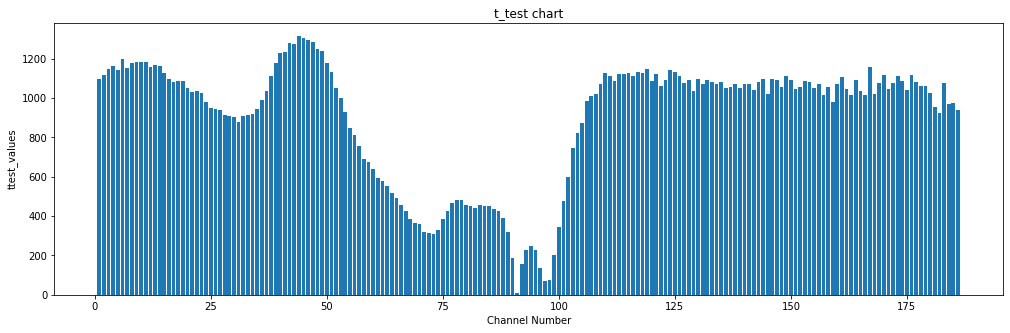

In [ ]:
plt.figure(figsize=(17, 5))
plt.bar(ttest_df.band_no.values, ttest_df.ttest_val.values)
plt.xlabel('Channel Number')
plt.ylabel('ttest_values')
plt.title('t_test chart')
# plt.savefig('/content/drive/MyDrive/Thesis/images/normalized/no_background/LR/' + 'ttest_normalized' + '.png')
plt.show() 

In [ ]:
sorted_ttest_df = ttest_df.sort_values(ascending=False, by='ttest_val')

In [ ]:
top_selected = sorted_ttest_df.iloc[:182,:]

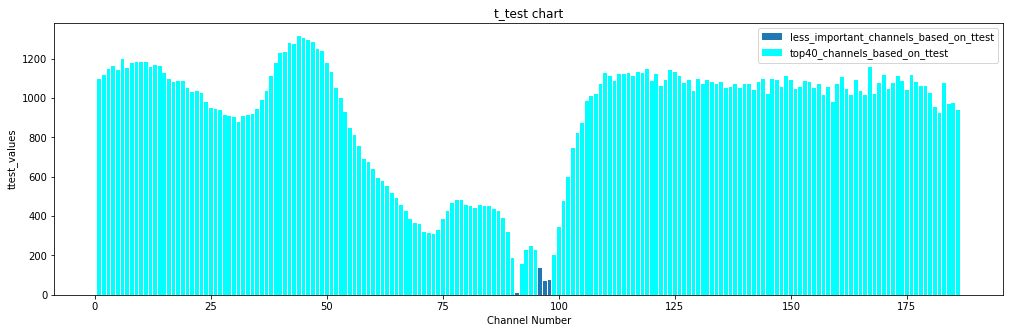

In [ ]:
plt.figure(figsize=(17, 5))
plt.bar(ttest_df.band_no.values, ttest_df.ttest_val.values, label='less_important_channels_based_on_ttest')
plt.bar(top_selected.band_no.values, top_selected.ttest_val.values, color='cyan', label='top40_channels_based_on_ttest')
plt.xlabel('Channel Number')
plt.ylabel('ttest_values')
plt.title('t_test chart')
plt.legend(loc='upper right')
# plt.savefig('/content/drive/MyDrive/Thesis/images/normalized/no_background/LR/' + 'top40_ttest_normalized_no_background' + '.png')
plt.show() 

### load selected channels for training

In [ ]:
bands_list = top_selected.band_no.values

In [ ]:
bands_list

array([ 44,  45,  46,  47,  42,  43,  48,  49,  41,  40,   6,  10,  11,
         9,  39,   8,  50,  13,   4,  14, 167,  12,   7, 119,   3,   5,
       124, 125, 117,  51, 110, 115,  15, 118, 114, 121, 113, 170,   2,
       176, 149, 173, 111,  38, 126, 116, 161, 146, 144, 130,  16,   1,
       123, 164, 128, 150, 147, 132, 120,  19, 112, 153, 174,  18, 154,
       133,  17, 177, 135, 143, 127, 172, 183, 169, 109, 141, 156, 134,
       140, 131, 160, 138, 179, 122, 178, 137, 152, 148, 158,  52, 136,
       155,  20, 139, 151, 162, 171, 142, 175,  37, 129,  22, 165,  21,
        23, 180, 168, 145, 108, 163, 157, 166, 107,  53,  36, 106,  24,
       159, 185, 184, 181,  25,  26,  35, 186,  27,  54, 182,  34,  28,
        33,  32,  29,  30,  31, 105,  55, 104,  56,  57, 103,  58,  59,
        60, 102,  61,  62,  63,  64,  65,  79,  78, 101,  77,  80,  83,
        66,  85,  84,  81,  82,  86,  87,  76,  67,  88,  68,  75,  69,
        70, 100,  74,  89,  71,  72,  73,  94,  95,  93,  99,  9

In [ ]:
# %%time
# directory = '/content/drive/MyDrive/Thesis/segmented_bands/'
# num_of_folds = 5
# kf = KFold(n_splits=num_of_folds, shuffle=True, random_state=42)

# X = np.array(np.load(directory + 'band_' + str(bands_list[0]) + '.npy').reshape(-1, 1), dtype='float32')
# y = np.array(np.load(directory + 'label.npy'), dtype='int')

# train_scores_mean_arr = np.array([])
# train_scores_std_arr = np.array([])
# val_scores_mean_arr = np.array([])
# val_scores_std_arr = np.array([])


# train_scores = np.array([])
# val_scores = np.array([])

# for train_index, val_index in kf.split(X):
#   # print("TRAIN:", train_index, "TEST:", val_index)
#   X_train, X_val = X[train_index], X[val_index]
#   y_train, y_val = y[train_index], y[val_index]

#   # clf = LogisticRegression(penalty='none', max_iter=500).fit(X_train, y_train)
#   clf = make_pipeline(StandardScaler(), LogisticRegression(penalty='none', max_iter=500))
#   clf.fit(X_train, y_train)

#   train_score = clf.score(X_train, y_train)
#   val_score = clf.score(X_val, y_val)

#   train_scores = np.append(train_scores, train_score)
#   val_scores = np.append(val_scores, val_score)

# train_scores_mean = np.mean(train_scores)
# train_scores_std = np.std(train_scores)
# val_scores_mean = np.mean(val_scores)
# val_scores_std = np.std(val_scores)

# train_scores_mean_arr = np.append(train_scores_mean_arr, train_scores_mean)
# train_scores_std_arr = np.append(train_scores_std_arr, train_scores_std)
# val_scores_mean_arr = np.append(val_scores_mean_arr, val_scores_mean)
# val_scores_std_arr = np.append(val_scores_std_arr, val_scores_std)

# for i in range(1, len(bands_list)):
#   # concatenate features one by one
#   X = np.concatenate((X, 
#                       np.array(np.load(directory + 'band_' + str(bands_list[i]) + '.npy').reshape(-1, 1), 
#                       dtype='float32')), axis=1)

#   # instantiate cross_validation instance
#   kf = KFold(n_splits=num_of_folds, shuffle=True, random_state=42)

#   train_scores = np.array([])
#   val_scores = np.array([])

#   for train_index, val_index in kf.split(X):
#     # print("TRAIN:", train_index, "TEST:", val_index)
#     X_train, X_val = X[train_index], X[val_index]
#     y_train, y_val = y[train_index], y[val_index]

#     # clf = LogisticRegression(penalty='none', max_iter=500).fit(X_train, y_train)
#     clf = make_pipeline(StandardScaler(), LogisticRegression(penalty='none', max_iter=500))
#     clf.fit(X_train, y_train)

#     train_score = clf.score(X_train, y_train)
#     val_score = clf.score(X_val, y_val)

#     train_scores = np.append(train_scores, train_score)
#     val_scores = np.append(val_scores, val_score)

#   train_scores_mean = np.mean(train_scores)
#   train_scores_std = np.std(train_scores)
#   val_scores_mean = np.mean(val_scores)
#   val_scores_std = np.std(val_scores)

#   train_scores_mean_arr = np.append(train_scores_mean_arr, train_scores_mean)
#   train_scores_std_arr = np.append(train_scores_std_arr, train_scores_std)
#   val_scores_mean_arr = np.append(val_scores_mean_arr, val_scores_mean)
#   val_scores_std_arr = np.append(val_scores_std_arr, val_scores_std)

#   print(i)

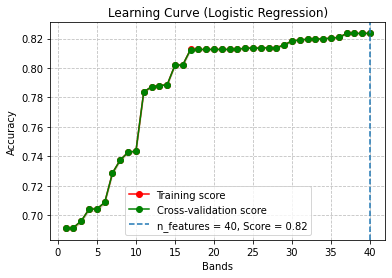

In [ ]:
# steps = np.arange(40) + 1
# plt.fill_between(steps, train_scores_mean_arr - train_scores_std_arr,
#                  train_scores_mean_arr + train_scores_std_arr, alpha=0.1, color="r")
# plt.fill_between(steps, val_scores_mean_arr - val_scores_std_arr,
#                  val_scores_mean_arr + val_scores_std_arr, alpha=0.1, color="g")
# plt.plot(steps, train_scores_mean_arr, 'o-', color="r", label="Training score")
# plt.plot(steps, val_scores_mean_arr, 'o-', color="g", label="Cross-validation score")
# plt.axvline(x=val_scores_mean_arr.argmax() + 1, ls='--', label='n_features = {}, Score = {}'.format                             (val_scores_mean_arr.argmax()+1, round(val_scores_mean_arr.max(), 2)))
# plt.xlabel("Bands")
# plt.ylabel("Accuracy")
# plt.title("Learning Curve (Logistic Regression)")
# plt.grid(b=True, which='major', color='silver', linestyle='--')
# plt.legend(loc="best")
# plt.show()

In [ ]:
# df = pd.DataFrame(data=steps, columns=['steps'])
# df.insert(loc=1, column='ordered_bands', value=bands_list, allow_duplicates=True)
# df.insert(loc=2, column='train_scores_mean', value=train_scores_mean_arr, allow_duplicates=True)
# df.insert(loc=3, column='train_scores_std', value=train_scores_std_arr, allow_duplicates=True)
# df.insert(loc=4, column='val_scores_mean', value=val_scores_mean_arr, allow_duplicates=True)
# df.insert(loc=5, column='val_scores_std', value=val_scores_std_arr, allow_duplicates=True)

In [ ]:
# df.to_csv('/content/drive/MyDrive/Thesis/models/ttest_LR_sklearn/leanrning_curve_sorted_40_band_ttest_sklearn.cvs')

In [ ]:
# df = pd.read_csv('/content/drive/MyDrive/Thesis/models/ttest_LR_sklearn/leanrning_curve_sorted_40_band_ttest_sklearn.cvs')
# df.head(20)

,Unnamed: 0,steps,ordered_bands,train_scores_mean,train_scores_std,val_scores_mean,val_scores_std
0,0,1,44,0.691189,0.000327,0.691179,0.001024
1,1,2,45,0.691706,0.000286,0.691707,0.000972
2,2,3,46,0.696251,0.000287,0.696291,0.000906
3,3,4,47,0.704288,0.000361,0.704257,0.001285
4,4,5,42,0.704384,0.000433,0.704367,0.001456
5,5,6,43,0.708803,0.000280,0.708777,0.000962
6,6,7,48,0.728820,0.000324,0.728833,0.001230
7,7,8,49,0.737690,0.000225,0.737690,0.000783
8,8,9,41,0.742854,0.000253,0.742815,0.000814
9,9,10,40,0.743601,0.000290,0.743569,0.001122


## logistic regression sklearn, gradient decent

In [ ]:
# X = X[::10, :]
# y = y[::10]

In [ ]:
# X.shape

(8411, 186)

In [ ]:
# %%time
# # directory = '/content/drive/MyDrive/Thesis/segmented_bands/'
# num_of_folds = 5
# # kf = KFold(n_splits=num_of_folds, shuffle=True, random_state=42)

# # X = np.array(np.load(directory + 'band_' + str(bands_list[0]) + '.npy').reshape(-1, 1), dtype='float32')
# # y = np.array(np.load(directory + 'label.npy'), dtype='int')

# train_scores_mean_arr = np.array([])
# train_scores_std_arr = np.array([])
# val_scores_mean_arr = np.array([])
# val_scores_std_arr = np.array([])


# train_scores = np.array([])
# val_scores = np.array([])

# for i in range(0, 186):
  
#   # instantiate cross_validation instance
#   kf = KFold(n_splits=num_of_folds, shuffle=True, random_state=42)

#   train_scores = np.array([])
#   val_scores = np.array([])

#   for train_index, val_index in kf.split(X):
#     # print("TRAIN:", train_index, "TEST:", val_index)
#     X_train, X_val = X[:, 0:i+1][train_index], X[:, 0:i+1][val_index]
#     y_train, y_val = y[train_index], y[val_index]

#     # clf = LogisticRegression(penalty='none', max_iter=500).fit(X_train, y_train)
#     clf = make_pipeline(StandardScaler(), LogisticRegression(penalty='none', max_iter=1000))
#     clf.fit(X_train, y_train)

#     train_score = clf.score(X_train, y_train)
#     val_score = clf.score(X_val, y_val)

#     train_scores = np.append(train_scores, train_score)
#     val_scores = np.append(val_scores, val_score)

#   train_scores_mean = np.mean(train_scores)
#   train_scores_std = np.std(train_scores)
#   val_scores_mean = np.mean(val_scores)
#   val_scores_std = np.std(val_scores)

#   train_scores_mean_arr = np.append(train_scores_mean_arr, train_scores_mean)
#   train_scores_std_arr = np.append(train_scores_std_arr, train_scores_std)
#   val_scores_mean_arr = np.append(val_scores_mean_arr, val_scores_mean)
#   val_scores_std_arr = np.append(val_scores_std_arr, val_scores_std)

#   print(i)

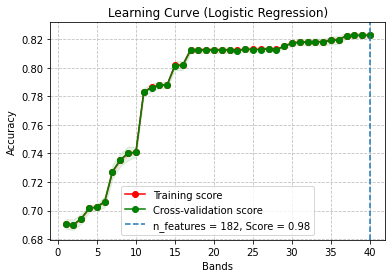

In [ ]:
# steps = np.arange(40) + 1
# # plt.figure(figsize=(18, 5))
# plt.fill_between(steps, train_scores_mean_arr[0:40] - train_scores_std_arr[0:40],
#                  train_scores_mean_arr[0:40] + train_scores_std_arr[0:40], alpha=0.1, color="r")
# plt.fill_between(steps, val_scores_mean_arr[0:40] - val_scores_std_arr[0:40],
#                  val_scores_mean_arr[0:40] + val_scores_std_arr[0:40], alpha=0.1, color="g")
# plt.plot(steps, train_scores_mean_arr[0:40], 'o-', color="r", label="Training score")
# plt.plot(steps, val_scores_mean_arr[0:40], 'o-', color="g", label="Cross-validation score")
# plt.axvline(x=val_scores_mean_arr[0:40].argmax() + 1, ls='--', label='n_features = {}, Score = {}'.format                             (val_scores_mean_arr.argmax()+1, round(val_scores_mean_arr.max(), 2)))
# plt.xlabel("Bands")
# plt.ylabel("Accuracy")
# plt.title("Learning Curve (Logistic Regression)")
# plt.grid(b=True, which='major', color='silver', linestyle='--')
# plt.legend(loc="best")
# plt.show()

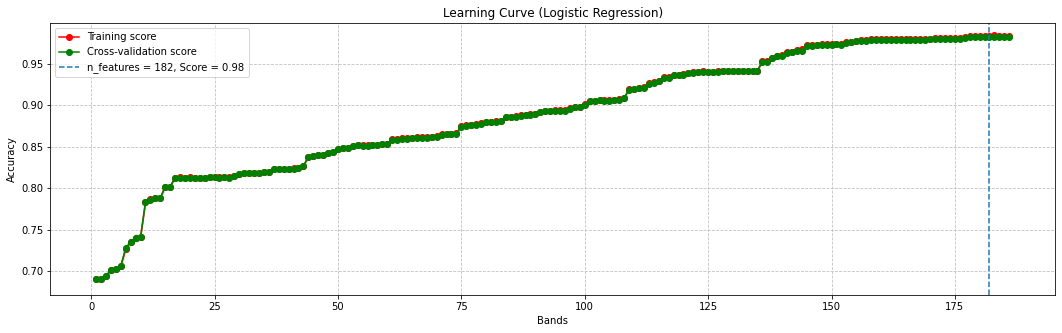

In [ ]:
# steps = np.arange(186) + 1
# plt.figure(figsize=(18, 5))
# plt.fill_between(steps, train_scores_mean_arr - train_scores_std_arr,
#                  train_scores_mean_arr + train_scores_std_arr, alpha=0.1, color="r")
# plt.fill_between(steps, val_scores_mean_arr - val_scores_std_arr,
#                  val_scores_mean_arr + val_scores_std_arr, alpha=0.1, color="g")
# plt.plot(steps, train_scores_mean_arr, 'o-', color="r", label="Training score")
# plt.plot(steps, val_scores_mean_arr, 'o-', color="g", label="Cross-validation score")
# plt.axvline(x=val_scores_mean_arr.argmax() + 1, ls='--', label='n_features = {}, Score = {}'.format                             (val_scores_mean_arr.argmax()+1, round(val_scores_mean_arr.max(), 2)))
# plt.xlabel("Bands")
# plt.ylabel("Accuracy")
# plt.title("Learning Curve (Logistic Regression)")
# plt.grid(b=True, which='major', color='silver', linestyle='--')
# plt.legend(loc="best")
# plt.show()

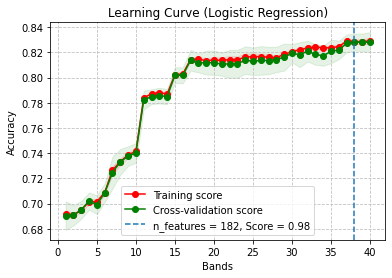

In [ ]:
# steps = np.arange(40) + 1
# # plt.figure(figsize=(18, 5))
# plt.fill_between(steps, train_scores_mean_arr[0:40] - train_scores_std_arr[0:40],
#                  train_scores_mean_arr[0:40] + train_scores_std_arr[0:40], alpha=0.1, color="r")
# plt.fill_between(steps, val_scores_mean_arr[0:40] - val_scores_std_arr[0:40],
#                  val_scores_mean_arr[0:40] + val_scores_std_arr[0:40], alpha=0.1, color="g")
# plt.plot(steps, train_scores_mean_arr[0:40], 'o-', color="r", label="Training score")
# plt.plot(steps, val_scores_mean_arr[0:40], 'o-', color="g", label="Cross-validation score")
# plt.axvline(x=val_scores_mean_arr[0:40].argmax() + 1, ls='--', label='n_features = {}, Score = {}'.format                             (val_scores_mean_arr.argmax()+1, round(val_scores_mean_arr.max(), 2)))
# plt.xlabel("Bands")
# plt.ylabel("Accuracy")
# plt.title("Learning Curve (Logistic Regression)")
# plt.grid(b=True, which='major', color='silver', linestyle='--')
# plt.legend(loc="best")
# plt.show()

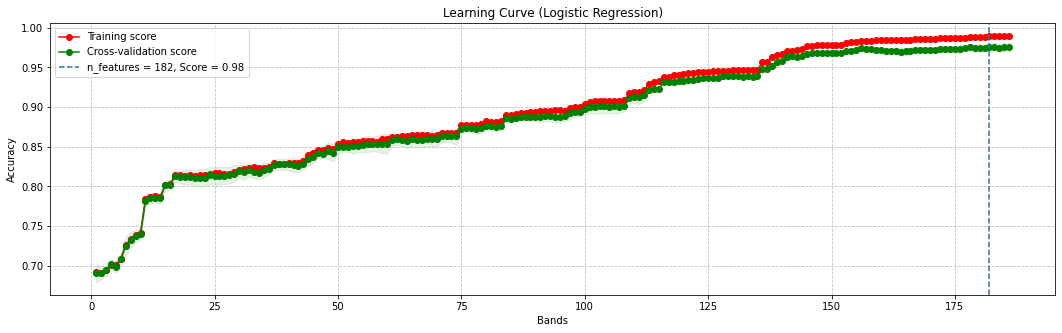

In [ ]:
# steps = np.arange(186) + 1
# plt.figure(figsize=(18, 5))
# plt.fill_between(steps, train_scores_mean_arr - train_scores_std_arr,
#                  train_scores_mean_arr + train_scores_std_arr, alpha=0.1, color="r")
# plt.fill_between(steps, val_scores_mean_arr - val_scores_std_arr,
#                  val_scores_mean_arr + val_scores_std_arr, alpha=0.1, color="g")
# plt.plot(steps, train_scores_mean_arr, 'o-', color="r", label="Training score")
# plt.plot(steps, val_scores_mean_arr, 'o-', color="g", label="Cross-validation score")
# plt.axvline(x=val_scores_mean_arr.argmax() + 1, ls='--', label='n_features = {}, Score = {}'.format                             (val_scores_mean_arr.argmax()+1, round(val_scores_mean_arr.max(), 2)))
# plt.xlabel("Bands")
# plt.ylabel("Accuracy")
# plt.title("Learning Curve (Logistic Regression)")
# plt.grid(b=True, which='major', color='silver', linestyle='--')
# plt.legend(loc="best")
# plt.show()

### plot learning curves

In [ ]:
def plot_learning_curve(estimator, title, X, y, axes=None, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Generate 3 plots: the test and training learning curve, the training
    samples vs fit times curve, the fit times vs score curve.

    Parameters
    ----------
    estimator : estimator instance
        An estimator instance implementing `fit` and `predict` methods which
        will be cloned for each validation.

    title : str
        Title for the chart.

    X : array-like of shape (n_samples, n_features)
        Training vector, where ``n_samples`` is the number of samples and
        ``n_features`` is the number of features.

    y : array-like of shape (n_samples) or (n_samples, n_features)
        Target relative to ``X`` for classification or regression;
        None for unsupervised learning.

    axes : array-like of shape (3,), default=None
        Axes to use for plotting the curves.

    ylim : tuple of shape (2,), default=None
        Defines minimum and maximum y-values plotted, e.g. (ymin, ymax).

    cv : int, cross-validation generator or an iterable, default=None
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:

          - None, to use the default 5-fold cross-validation,
          - integer, to specify the number of folds.
          - :term:`CV splitter`,
          - An iterable yielding (train, test) splits as arrays of indices.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : int or None, default=None
        Number of jobs to run in parallel.
        ``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.
        ``-1`` means using all processors. See :term:`Glossary <n_jobs>`
        for more details.

    train_sizes : array-like of shape (n_ticks,)
        Relative or absolute numbers of training examples that will be used to
        generate the learning curve. If the ``dtype`` is float, it is regarded
        as a fraction of the maximum size of the training set (that is
        determined by the selected validation method), i.e. it has to be within
        (0, 1]. Otherwise it is interpreted as absolute sizes of the training
        sets. Note that for classification the number of samples usually have
        to be big enough to contain at least one sample from each class.
        (default: np.linspace(0.1, 1.0, 5))
    """
    if axes is None:
        _, axes = plt.subplots(1, 3, figsize=(20, 5))

    axes[0].set_title(title)
    if ylim is not None:
        axes[0].set_ylim(*ylim)
    axes[0].set_xlabel("Training examples")
    axes[0].set_ylabel("Score")

    train_sizes, train_scores, test_scores, fit_times, _ = \
        learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs,
                       train_sizes=train_sizes,
                       return_times=True)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    fit_times_mean = np.mean(fit_times, axis=1)
    fit_times_std = np.std(fit_times, axis=1)

    # Plot learning curve
    axes[0].grid()
    axes[0].fill_between(train_sizes, train_scores_mean - train_scores_std,
                         train_scores_mean + train_scores_std, alpha=0.1,
                         color="r")
    axes[0].fill_between(train_sizes, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1,
                         color="g")
    axes[0].plot(train_sizes, train_scores_mean, 'o-', color="r",
                 label="Training score")
    axes[0].plot(train_sizes, test_scores_mean, 'o-', color="g",
                 label="Cross-validation score")
    axes[0].legend(loc="best")

    # Plot n_samples vs fit_times
    axes[1].grid()
    axes[1].plot(train_sizes, fit_times_mean, 'o-')
    axes[1].fill_between(train_sizes, fit_times_mean - fit_times_std,
                         fit_times_mean + fit_times_std, alpha=0.1)
    axes[1].set_xlabel("Training examples")
    axes[1].set_ylabel("fit_times")
    axes[1].set_title("Scalability of the model")

    # Plot fit_time vs score
    axes[2].grid()
    axes[2].plot(fit_times_mean, test_scores_mean, 'o-')
    axes[2].fill_between(fit_times_mean, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1)
    axes[2].set_xlabel("fit_times")
    axes[2].set_ylabel("Score")
    axes[2].set_title("Performance of the model")

    return plt

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/dist-packages/matplotlib/pyplot.py'>

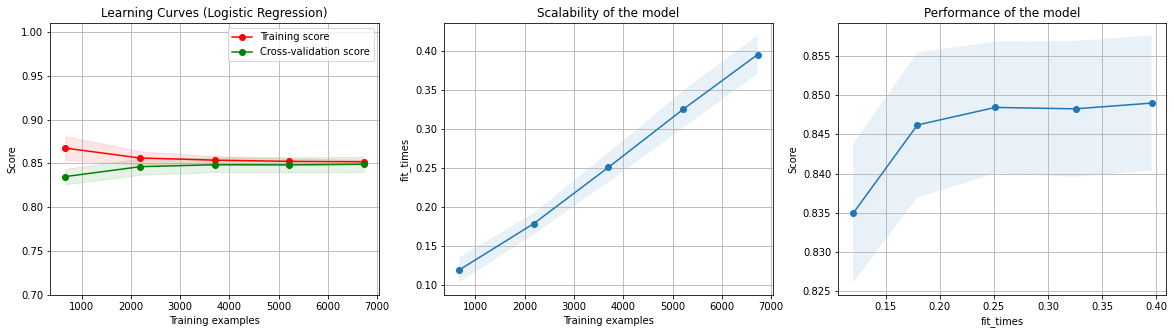

In [ ]:
title = "Learning Curves (Logistic Regression)"
# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=42)

# clf = LogisticRegression(penalty='none', max_iter=500)
clf = make_pipeline(StandardScaler(), LogisticRegression(penalty='none', max_iter=500)) # solver='saga'
# clf.fit(X_train, y_train)
plot_learning_curve(clf, title, X, y, ylim=(0.7, 1.01), cv=cv)

## logistic regression keras, Adam optimization

In [ ]:
# %%time
directory = '/content/drive/MyDrive/Thesis/segmented_bands/'
num_of_folds = 5
kf = KFold(n_splits=num_of_folds, shuffle=True, random_state=42)

# X = np.array(np.load('/content/drive/MyDrive/Thesis/top40_ttest_order.npy'), dtype='float32')
# y = np.array(np.load(directory + 'label.npy'), dtype='int')

train_scores_mean_arr = np.array([])
train_scores_std_arr = np.array([])
val_scores_mean_arr = np.array([])
val_scores_std_arr = np.array([])

train_scores = np.array([])
val_scores = np.array([])

for train_index, val_index in kf.split(X):
  # print("TRAIN:", train_index, "TEST:", val_index)
  X_train, X_val = X[:, 0:1][train_index], X[:, 0:1][val_index]
  y_train, y_val = y[train_index], y[val_index]

  input_shape = [X[:, 0:1].shape[1],]
  band_normalizer = preprocessing.Normalization(input_shape=input_shape)

  model = tf.keras.Sequential([
      band_normalizer,
      layers.Dense(units=1, activation='sigmoid')
  ])

  model.compile(
      optimizer=tf.optimizers.Adam(learning_rate=0.1),
      loss='binary_crossentropy', metrics=['accuracy'])

  callback = tf.keras.callbacks.EarlyStopping(monitor='loss', min_delta=1e-3, patience=3)

  # %%time
  history = model.fit(
      X_train, y_train,
      epochs=1,
      # suppress logging
      verbose=0,
      # Calculate validation results on 25% of the training data
      # validation_split = 0.25,
      validation_data=(X_val, y_val), 
      # callbacks=[callback]
      )


  train_pred = model.predict(X_train)
  train_score = accuracy_score(np.round(train_pred), y_train)

  val_pred = model.predict(X_val)
  val_score = accuracy_score(np.round(val_pred), y_val)

  train_scores = np.append(train_scores, train_score)
  val_scores = np.append(val_scores, val_score)

train_scores_mean = np.mean(train_scores)
train_scores_std = np.std(train_scores)
val_scores_mean = np.mean(val_scores)
val_scores_std = np.std(val_scores)

train_scores_mean_arr = np.append(train_scores_mean_arr, train_scores_mean)
train_scores_std_arr = np.append(train_scores_std_arr, train_scores_std)
val_scores_mean_arr = np.append(val_scores_mean_arr, val_scores_mean)
val_scores_std_arr = np.append(val_scores_std_arr, val_scores_std)

In [ ]:
train_scores_mean_arr

array([0.68856715])

In [ ]:
val_scores_mean_arr

array([0.68850821])

In [ ]:
# np.save('/content/drive/MyDrive/Thesis/shuffled_top40/dataset.npy', X)

In [ ]:
y = df.iloc[:, 0:1]

In [ ]:
# np.save('/content/drive/MyDrive/Thesis/shuffled_top40/label.npy', y)

In [ ]:
# y = np.load('/content/drive/MyDrive/Thesis/shuffled_top40/label.npy')

In [ ]:
# X = np.load('/content/drive/MyDrive/Thesis/shuffled_top40/dataset.npy')

### logistic regression using keras

start preparing dataset

In [ ]:
input_shape = [X.shape[1],]
input_shape

[40]

In [ ]:
band_normalizer = preprocessing.Normalization(input_shape=input_shape)

In [ ]:
# bands = np.array(X)

In [ ]:
band_normalizer.adapt(np.array(X))

In [ ]:
model = tf.keras.Sequential([
    band_normalizer,
    layers.Dense(units=1, activation='sigmoid')
])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
normalization (Normalization (None, 40)                81        
_________________________________________________________________
dense (Dense)                (None, 1)                 41        
Total params: 122
Trainable params: 41
Non-trainable params: 81
_________________________________________________________________


In [ ]:
model.compile(
    optimizer=tf.optimizers.Adam(learning_rate=0.1),
    loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', min_delta=1e-3, patience=3)

In [ ]:
%%time
history = model.fit(
    X, y,
    epochs=100,
    # suppress logging
    verbose=1,
    # Calculate validation results on 25% of the training data
    validation_split = 0.25,
    callbacks=[callback]
    )

Epoch 1/100
197111/197111 [==============================] - 504s 3ms/step - loss: 0.4114 - accuracy: 0.8311 - val_loss: 0.3857 - val_accuracy: 0.8385
Epoch 2/100
197111/197111 [==============================] - 524s 3ms/step - loss: 0.4094 - accuracy: 0.8329 - val_loss: 0.4564 - val_accuracy: 0.8068
Epoch 3/100
197111/197111 [==============================] - 506s 3ms/step - loss: 0.4101 - accuracy: 0.8327 - val_loss: 0.4004 - val_accuracy: 0.8255
Epoch 4/100
197111/197111 [==============================] - 515s 3ms/step - loss: 0.4101 - accuracy: 0.8326 - val_loss: 0.3795 - val_accuracy: 0.8467
CPU times: user 40min, sys: 7min 32s, total: 47min 32s
Wall time: 34min 9s


In [ ]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,accuracy,val_loss,val_accuracy,epoch
0,0.410023,0.832448,0.385663,0.838519,0
1,0.409838,0.832613,0.456354,0.806801,1
2,0.409925,0.832628,0.400411,0.825494,2
3,0.409666,0.832609,0.379524,0.846710,3


In [ ]:
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.ylim([0, 5])
  plt.xlabel('Epoch')
  plt.ylabel('error')
  plt.legend()
  plt.grid(True)

In [ ]:
def plot_accuracy(history):
  plt.plot(history.history['accuracy'], label='accuracy')
  plt.plot(history.history['val_accuracy'], label='val_accuracy')
  plt.ylim([0, 1])
  plt.xlabel('Epoch')
  plt.ylabel('accuracy')
  plt.legend()
  plt.grid(True)

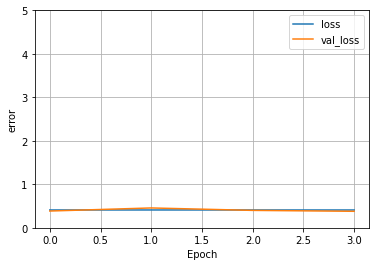

In [ ]:
plot_loss(history)

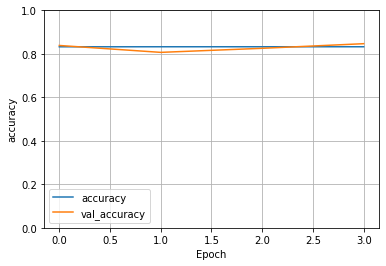

In [ ]:
plot_accuracy(history)

In [ ]:
# # save model
# model.save('/content/drive/MyDrive/Thesis/models/LR_normalized_top40_ttest_nobackground')

INFO:tensorflow:Assets written to: /content/drive/MyDrive/Thesis/models/LR_normalized_top40_ttest_nobackground/assets


In [ ]:
# # load model
# from tensorflow import keras
# model = keras.models.load_model('/content/drive/MyDrive/Thesis/models/LR_normalized_top40_ttest_nobackground')

In [ ]:
# predict = model.predict(X)
# accuracy_score(np.round(predict), y[:])

## test model

In [ ]:
# X = np.array(np.load('/content/drive/MyDrive/Thesis/dataset/segmented_normalized_one_tenth/X.npy'), dtype='float32')
# y = np.array(np.load('/content/drive/MyDrive/Thesis/dataset/segmented_normalized_one_tenth/y.npy'), dtype='int')

In [ ]:
# X = X[::10, :]
# y = y[::10]

In [ ]:
X.shape

(84101, 186)

In [ ]:
  %%time
  # instantiate cross_validation instance
  num_of_folds = 5
  kf = KFold(n_splits=num_of_folds, shuffle=True, random_state=42)

  train_scores = np.array([])
  val_scores = np.array([])

  for train_index, val_index in kf.split(X):
    # print("TRAIN:", train_index, "TEST:", val_index)
    X_train, X_val = X[train_index], X[val_index]
    y_train, y_val = y[train_index], y[val_index]

    # clf = LogisticRegression(penalty='none', max_iter=500).fit(X_train, y_train)
    clf = make_pipeline(StandardScaler(), LogisticRegression(penalty='none', max_iter=1000))
    clf.fit(X_train, y_train)

    train_score = clf.score(X_train, y_train)
    val_score = clf.score(X_val, y_val)

    train_scores = np.append(train_scores, train_score)
    val_scores = np.append(val_scores, val_score)

CPU times: user 5min 12s, sys: 1min 59s, total: 7min 12s
Wall time: 1min 50s


In [ ]:
# getting list of cropped reference images
source_file = '/content/drive/MyDrive/Thesis/source/VNIR_img.txt'
img_list = []
with open(source_file, "r") as listOfImages:
    for line in listOfImages:
        to_lower = str(line.strip()).lower() # make lower case to match reference imgs name
        img_list.append(to_lower)
        
print(len(img_list))

12


In [ ]:
ref = pd.read_csv('/content/drive/MyDrive/Thesis/files/img_labels.csv', encoding='latin-1')
ref.insert(loc=1, column='ref', value=img_list)
ref.head(3)

,Img_name,ref,PCR
0,Ind-AT1_V1-A_Blatt_VNIR,ind-at1_v1-a_blatt_vnir,1
1,Ind-AT1_V1-B_Blatt_VNIR,ind-at1_v1-b_blatt_vnir,1
2,Ind-AT1_V1-C_Blatt_VNIR,ind-at1_v1-c_blatt_vnir,1


In [ ]:
for i in range(12):
  img = np.load('/content/drive/MyDrive/Thesis/cropped_imgs/'+ ref.Img_name[i] +'.npy')
  img_reshaped = img.reshape(2270 * 1270,186)
  # prediction basedon logistic regression
  LR_predicted = np.array(clf.predict(img_reshaped))
  # loading segmentation reference
  ref_img = np.load('/content/drive/MyDrive/Thesis/reference_img/cropped/'+ str(ref.ref[i]) +'.npy')
  ref_img[ref_img>0] = 1

  LR_predicted_ref = LR_predicted.reshape(2270, 1270) * ref_img
  LR_predicted_ref = LR_predicted_ref.reshape(2270, 1270, 1)

  ground_truth = np.zeros([2270, 1270, 3])
  ground_truth[:, :, 0:1] = img[:,:, 45:46].reshape((2270, 1270, 1))
  ground_truth[:, :, 1:2] = img[:,:, 120:121].reshape((2270, 1270, 1))
  ground_truth[:, :, 2:3] = img[:,:, 76:77].reshape((2270, 1270, 1))

  rgb_LR = np.zeros([2270, 1270, 3])
  rgb_LR[:, :, 0:1] = img[:,:, 45:46].reshape((2270, 1270, 1)) + LR_predicted_ref
  rgb_LR[:, :, 1:2] = img[:,:, 120:121].reshape((2270, 1270, 1))
  rgb_LR[:, :, 2:3] = img[:,:, 76:77].reshape((2270, 1270, 1))

  # plt.title('Ground_truth bands 44, 42, 47  ' + ref.Img_name[i])
  # plt.imsave('/content/drive/MyDrive/Thesis/predicted/Ground_Truth/' + ref.Img_name[i] + '.png', ground_truth)
  # # plt.imshow(ground_truth)

  rgb_LR = rgb_LR / np.max(rgb_LR)
  plt.title('LR based prediction  ' + ref.Img_name[i])
  plt.imsave('/content/drive/MyDrive/Thesis/predicted/LR_1percent_data/LR_predicted' + ref.Img_name[i] + '.png', rgb_LR)
  # plt.imshow(rgb_LR)
  print(i)

### recall precision curve

In [ ]:
X = np.array(np.load('/content/drive/MyDrive/Thesis/dataset/segmented_normalized_original_size/X.npy'), dtype='float32')
y = np.array(np.load('/content/drive/MyDrive/Thesis/dataset/segmented_normalized_original_size/y.npy'), dtype='int')

In [ ]:
predicted = clf.predict(X)

In [ ]:
disp = plot_precision_recall_curve(clf, X, y)

In [ ]:
import os, signal
os.kill(os.getpid(), signal.SIGKILL)